## Function to extract timeslots from file and make composite 


In [2]:
import pandas as pd

# import tracks for CNRR 
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/Tracks_CNRR_2006-2016_storms.h5'
tracks = pd.read_hdf(file, 'table')
cnrr= '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/track_statistics_cnrr.h5'
cnrr_cells= pd.read_hdf(cnrr, 'table')
cnrr_intense= cnrr_cells.sort_values(by = 'features>5mm', ascending = False)[0:1000]

In [32]:
import numpy as np
np.unique(cnrr_intense.init_time.values).shape

(988,)

In [27]:
# check how much are within TP boundary 

i = 0 
for c in cnrr_intense.id.values:
    if i == 0:
        df= tracks.loc[tracks.cell == c ]
        i+=1 
    else:
        df= df.append(tracks.loc[tracks.cell == c ])
        
        
        
tp1 = df[df.latitude.values > 30]
tp2 = tp1[tp1.latitude.values < 40 ] 
tp3 = tp2[tp2.longitude.values > 80]
tp = tp3[tp3.longitude.values < 105]
tp.sort_values(by = 'frame')
tp.shape

(162, 20)

In [3]:
# function with input= subset of track stats, track dataframe, parameter 
# output = composite matrix for subset

In [44]:
## read in corresponding file and timestep 
from netCDF4 import Dataset
prcp= '/media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_'+ year + month +'_TP.nc4.nc4'
ds = Dataset(prcp)
level = 15 
uwd = np.array(ds['uwd'])[frame, :, :, :]
vwd = np.array(ds['vwd'])[frame, :, :, :]



IndexError: uwd not found in /

In [ ]:
for c in cells_intense.id.values:
    # extract tracked features for corresponding trajectory (cell)
    tracks_cell= tracks[tracks.cell == c]
    
    # loop through all feature timesteps 
    for fidx in tracks_cell.index:
        feature = tracks[tracks.index == fidx]

        # get time info for feature 
        t= feature.timestr.values
        date = t.astype('datetime64[s]').item()
        year = str(date.year)
        month = str(date.month)
        if len(month)== 1:
            month = '0'+month

        yearmonth = year + '-' + month
        tracks_month = tracks.loc[tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]

        frame = feature.frame.values - tracks_month.frame.values[0]
        print('looking at precip feature in ...',t)

        ## read in corresponding file and timestep 
        prcp= '/media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_'+ year + month +'_TP.nc4.nc4'
        ds = Dataset(prcp)
        level = 15 
        uwd = np.array(ds['uwd'])[frame, :, :, :]
        vwd = np.array(ds['vwd'])[frame, :, :, :]

        
        # calculate mean field 
        mean_u= 
        mean_v= 
        
        

- what are the pressure levels? 
- composites of vertical wind shear possible over terrain? 

## Vertical wind shear CNRR 

In [1]:
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt


In [88]:
datadir= '/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/CNRR-upper-levels-reanalysis/2017'
file = '/wrfout_2017_18:00UTC.nc'
data= Dataset(datadir+file)

day= 10
lon_idx= 100
lat_idx= 100
uwd= np.array(data['uwd'][day,:,lon_idx, lat_idx])
vwd= np.array(data['vwd'][day,:,lon_idx,lat_idx])
hgt= np.array(data['hgt'][day,:,lon_idx,lat_idx])/9.8
#data.variables

In [90]:
ws= np.sqrt(np.square(uwd) + np.square(vwd))[1::]
ws = np.flip(ws, axis = 0)

Text(0.5, 0, 'vertical wind shear (s$^{-1}$)')

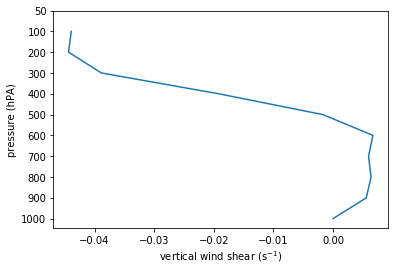

In [97]:
distance = 100000 # distance in meter 
shear = (ws - ws[0]) / distance * 1000

# wind profile 
plt.plot(shear[0:10], np.arange(0,10))

labels= ['1000', '900', '800', '700', '600', '500', '400', '300', '200', '100', '50']
plt.yticks(np.arange(0,11), labels)
plt.ylabel('pressure (hPA)')
plt.xlabel('vertical wind shear (s$^{-1}$)')



##  Plot upper-level wind field for specific time slot 

In [113]:
height = 10
uwd= np.array(data['uwd'][day,height, :, :])
vwd= np.array(data['vwd'][day,height, :, :])
coords = '/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/CNRR-upper-levels-reanalysis/daily/surface_20150112.nc'
ds= Dataset(coords)

lat= np.array(ds['LAT'])
lon = np.array(ds['LON'])

In [101]:
import matplotlib.pyplot as plt
import cartopy
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


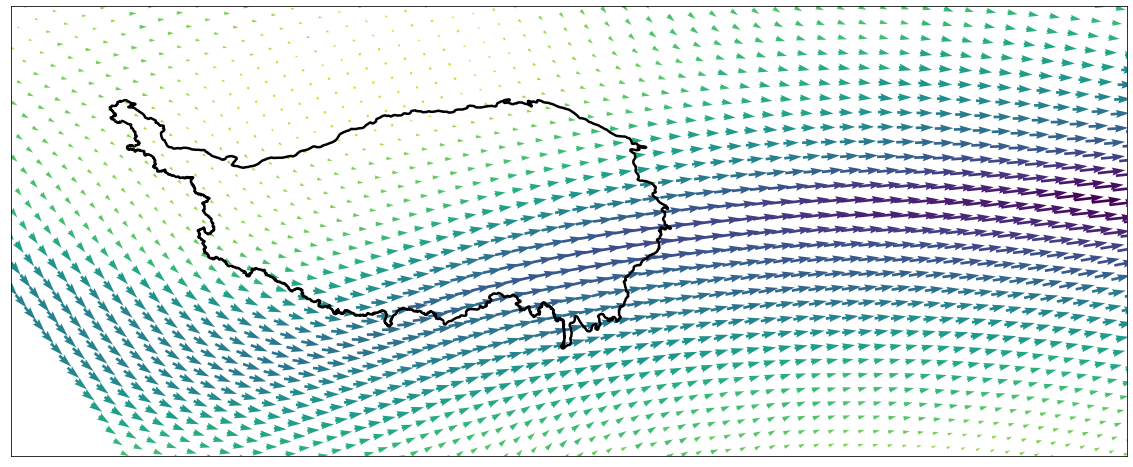

In [128]:
# calculate wind speed 


plt.figure(figsize=(20, 10))


m = Basemap(projection='cyl', llcrnrlat=20.0,urcrnrlat=45.0, llcrnrlon=68.0, urcrnrlon=130,  resolution = 'c')

speed=np.sqrt(uwd*uwd+ vwd*vwd)

yy=np.arange(0,len(lat),5)
xx=np.arange(0,len(lon),5)

points=np.meshgrid(yy,xx)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


m.quiver(xi[points],yi[points],uwd[points],vwd[points],speed[points],cmap=cmap,latlon=True)
plt.show()

# with all points for comparison
#m.quiver(xi,yi,uwd,vwd,speed,cmap=cmap,latlon=True)

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


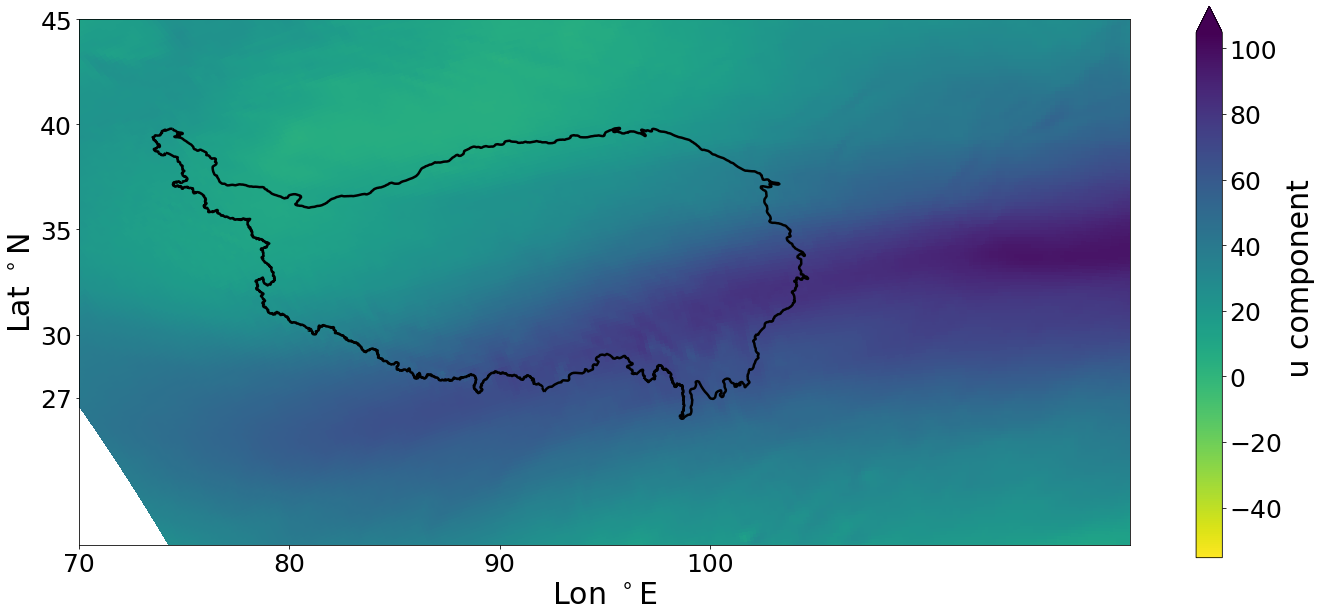

In [111]:

plt.figure(figsize=(20, 9))

cmap = plt.cm.get_cmap('viridis_r')

m = Basemap(projection='cyl', llcrnrlat=20.0,urcrnrlat=45.0, llcrnrlon=70.0, urcrnrlon=120,  resolution = 'c')

xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, uwd, cmap=cmap )
cmap.set_under(color='lightyellow')

xlabels=[70, 80, 90, 100]
ylabels= [ 27, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$E',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)

cbar = plt.colorbar(extend= 'max')
cbar.set_label(' u component', fontsize= 30)

plt.rcParams.update({'font.size': 25})
plt.tight_layout()

plt.savefig('/media/juli/Elements/comparison/cnrr_windfield.png')
